<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-пакетов" data-toc-modified-id="Загрузка-пакетов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка пакетов</a></span></li><li><span><a href="#Загрузка-файла" data-toc-modified-id="Загрузка-файла-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка файла</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Анализ-всего-периода" data-toc-modified-id="Анализ-всего-периода-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ всего периода</a></span></li><li><span><a href="#Анализ-последних-двух-недель-периода" data-toc-modified-id="Анализ-последних-двух-недель-периода-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ последних двух недель периода</a></span></li><li><span><a href="#График-со-средним-и-СО" data-toc-modified-id="График-со-средним-и-СО-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>График со средним и СО</a></span></li></ul></li><li><span><a href="#Обучение-и-тестирование-моделей" data-toc-modified-id="Обучение-и-тестирование-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и тестирование моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Линейная регрессия</a></span><ul class="toc-item"><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Дерево решений</a></span><ul class="toc-item"><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></li><li><span><a href="#LightGBMRegressor" data-toc-modified-id="LightGBMRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LightGBMRegressor</a></span><ul class="toc-item"><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Загрузка пакетов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

### Загрузка файла

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [3]:
print(data.head())

print()

print('Количество пропусков:')
print(data.isna().sum())

print()

print('Количество дубликатов:')
print(data.index.duplicated().sum())

print()

print('Являются ли данные монотонными:')
print(data.index.is_monotonic)

                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32

Количество пропусков:
num_orders    0
dtype: int64

Количество дубликатов:
0

Являются ли данные монотонными:
True


Первоначально мы можем сказать, что у нас имеются данные с 1 марта 2018 до 31 августа 2018 года c 10-минутным интервалом между временными промежутками. У нас нет ни пропусков, ни дубликатов.

## Анализ

In [4]:
#ресемплируем данные по одному часу
data = data.resample('1H').sum()
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


### Анализ всего периода

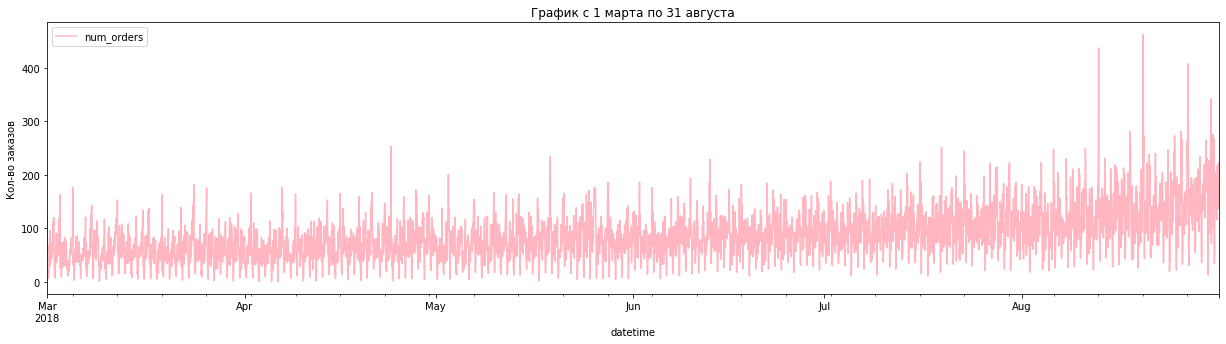

In [5]:
figsize = (21,5)

data.plot(figsize = figsize, color = 'lightpink')
plt.ylabel('Кол-во заказов')
plt.title('График с 1 марта по 31 августа')
plt.show()

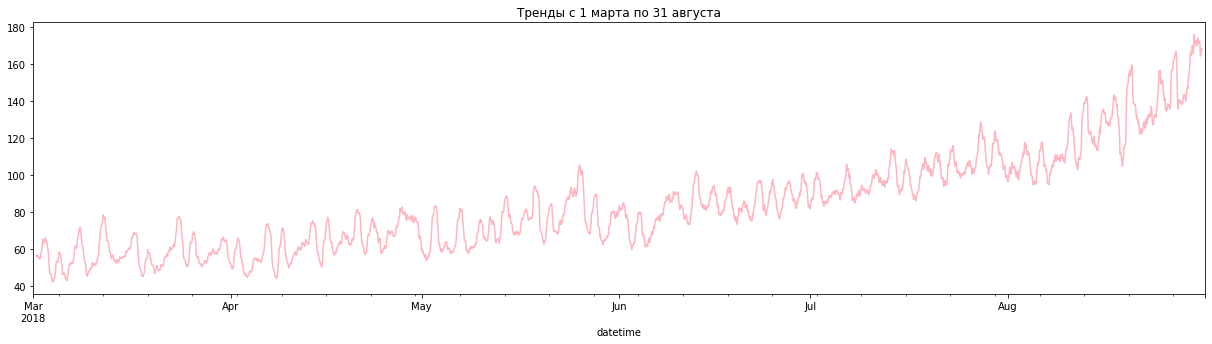

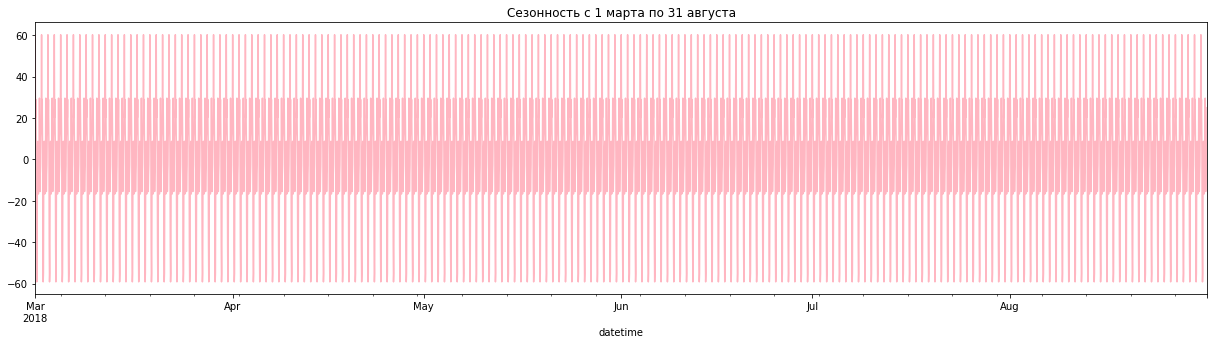

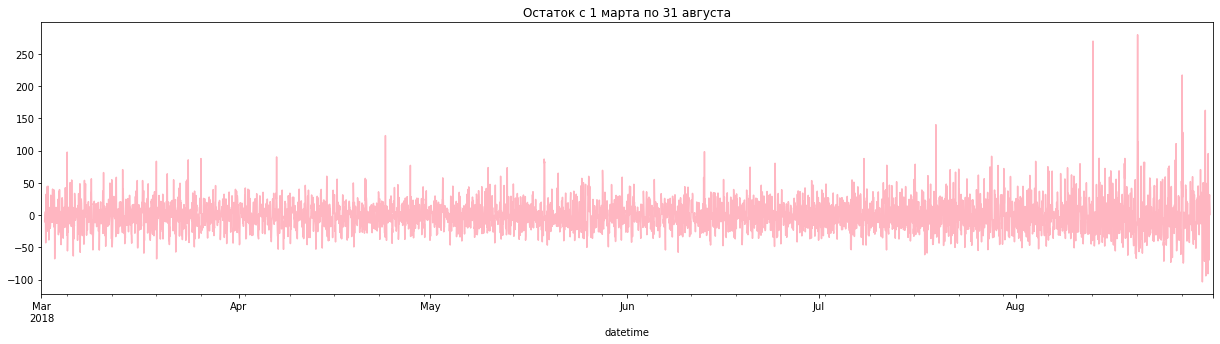

In [6]:
#рассмотрим тренды, сезонность, остаток декомпозиции по всему датасету
decomposed_data = seasonal_decompose(data)

decomposed_data.trend.plot(figsize = figsize, color = 'lightpink')
plt.title('Тренды с 1 марта по 31 августа')
plt.show()
decomposed_data.seasonal.plot(figsize = figsize, color = 'lightpink')
plt.title('Сезонность с 1 марта по 31 августа')
plt.show()
decomposed_data.resid.plot(figsize = figsize, color = 'lightpink')
plt.title('Остаток с 1 марта по 31 августа')
plt.show()

По общему графику ничего не понятно, но при этом мы можем сделать некоторые выводы, исходя из трендов, сезонности и остатка:  
  
1. За весь период с начала весны до конца лета мы может видеть тренд на увеличение заказов.
2. График сезонности явно показывает, что есть какая-то периодичность, скорее всего это сезонность в один день, но это мы уже проанализируем на меньшем отрезке времени.


### Анализ последних двух недель периода

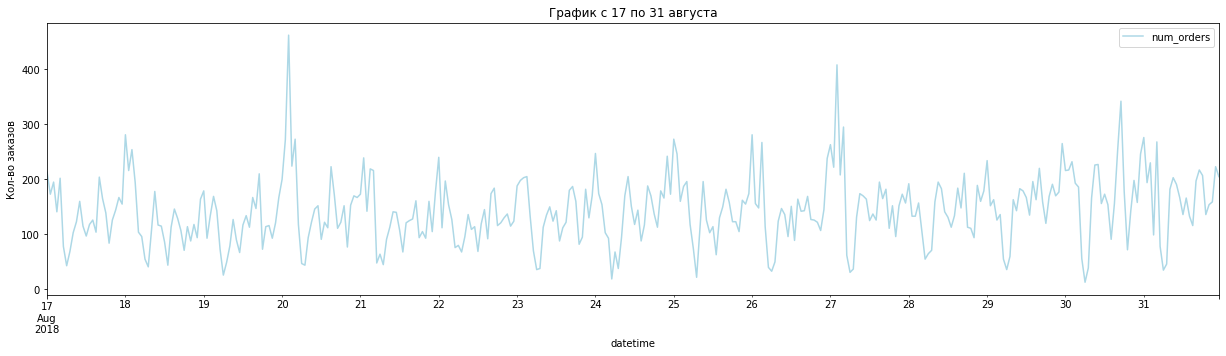

In [7]:
#рассмотрим последние две недели
data['2018-08-17':'2018-08-31'].plot(figsize = figsize, color = 'lightblue')
plt.ylabel('Кол-во заказов')
plt.title('График с 17 по 31 августа')
plt.show()

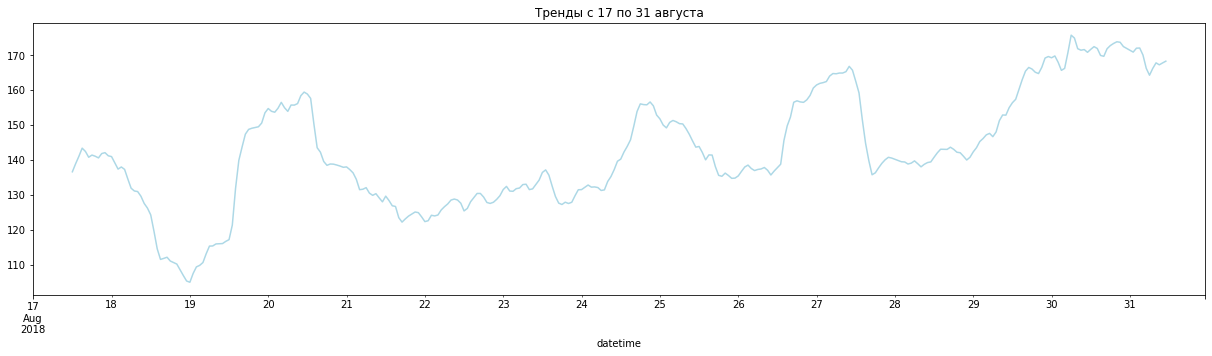

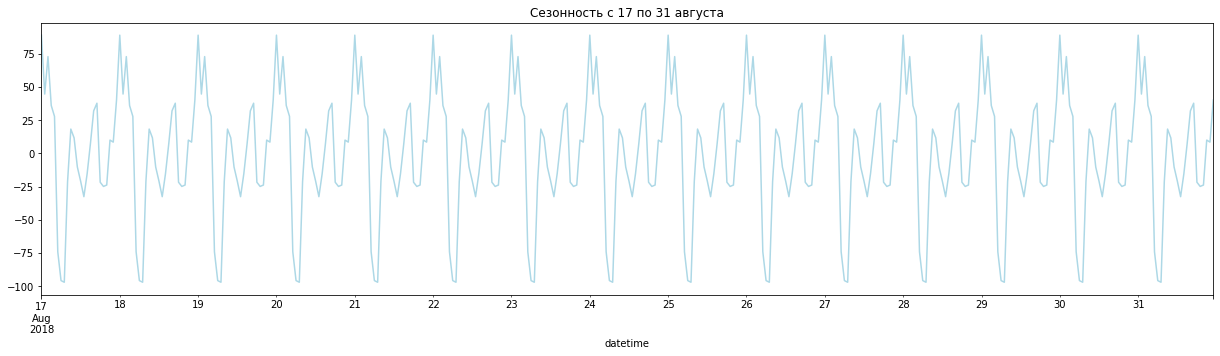

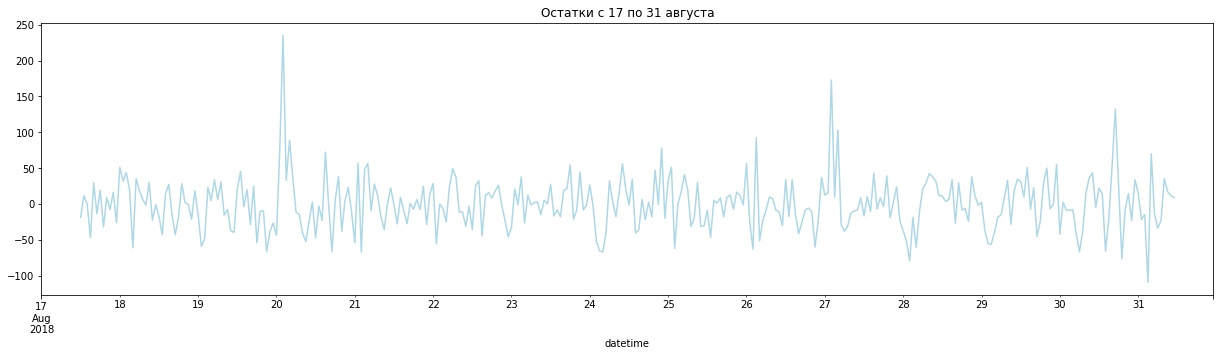

In [8]:
# Рассмотрим тернды, сезонность, остаток декомпозиции заказа такси
decomposed_data = seasonal_decompose(data['2018-08-17':'2018-08-31'])

decomposed_data.trend.plot(figsize = figsize, color = 'lightblue')
plt.title('Тренды с 17 по 31 августа')
plt.show()
decomposed_data.seasonal.plot(figsize = figsize, color = 'lightblue')
plt.title('Сезонность с 17 по 31 августа')
plt.show()
decomposed_data.resid.plot(figsize = figsize, color = 'lightblue')
plt.title('Остатки с 17 по 31 августа')
plt.show()

Благодаря анализу отдельных двух недель мы можем сделать некоторые выводы:
  
1. Мы можем подтвердить "сезонность" в один день.
2. По остаткам есть ощущение, что возможны особенности по дням недели (20 и 27 августа).
3. Каждый день больше всего заказов в первые часы новых суток и ближе ко дню.

### График со средним и СО

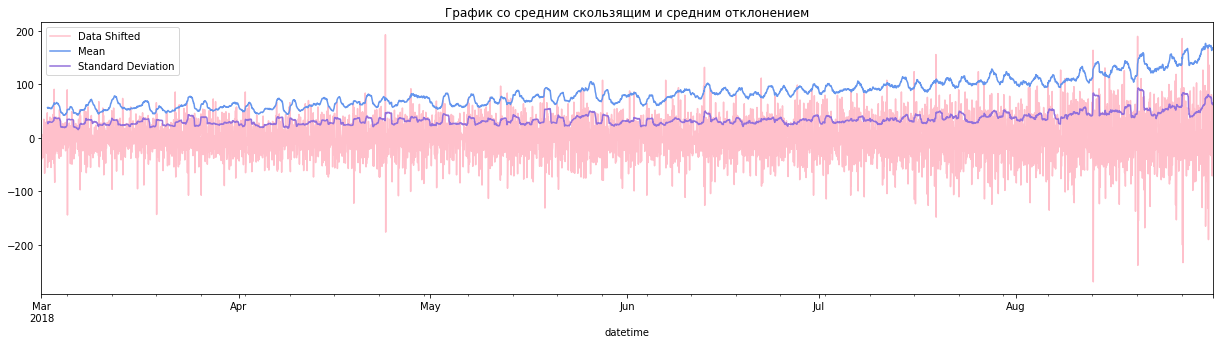

In [9]:
data_shift = data - data.shift()

data_shift['mean'] = data['num_orders'].rolling(24).mean()
data_shift['std'] = data['num_orders'].rolling(24).std()
#data_shift.plot(figsize = figsize, color = {'blue', 'mediumpurple', 'pink'})
#plt.show()

data_shift['num_orders'].plot(figsize=figsize, color='pink', label='Data Shifted')
data_shift['mean'].plot(figsize=figsize, color='cornflowerblue', label='Mean')
data_shift['std'].plot(figsize=figsize, color='mediumpurple', label='Standard Deviation')
plt.legend()
plt.title('График со средним скользящим и средним отклонением')
plt.show()

*Выводы:*
  
- Ряд не станционарный, так как мы видим явное увеличение тренда, среднего скользящего и СО, а также выбросы в остатках
- Нам необходимо добавить информацию о часах (явное изменение количества заказов в зависимости от времени), день (в разные дни разное количество), день недели (есть какая-то связь с количеством заказов по графикам) и месяц (общий тренд на увеличение заказов с начала весны до конца августа

## Обучение и тестирование моделей

Для каждой модели было решено подобрать индивидуальные значения лага и окна. Поэтому каждую модель после нахожения нужных параметров буду тестировать и сравнивать с результатами предсказания. Визуальный результат тоже важен помимо показателя RMSE.

### Подготовка

In [10]:
#ввожу функцию признаков:
def make_features(df, max_lag, rolling_mean_size):
    df = data.copy()
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return df

In [11]:
#ввожу функцию для разбивки датасета на обучающую, валидационную и тестовую выборки
def preprocess_data(df):
    train, valid = train_test_split(df, shuffle=False, test_size=0.55)
    train = train.dropna()
    
    valid, test = train_test_split(valid, shuffle=False, test_size=0.182)
    
    features_train = train.drop('num_orders', axis=1)
    target_train = train['num_orders']
    
    features_valid = valid.drop('num_orders', axis=1)
    target_valid = valid['num_orders']
    
    features_test = test.drop('num_orders', axis=1)
    target_test = test.num_orders
    
    return features_train, target_train, features_valid, target_valid, features_test, target_test

### Линейная регрессия

#### Обучение

In [12]:
best_rmse = 48

for max_lag in range(1, 50):
    for rolling_mean_size in range(1, 50):
        data_sec = make_features(data, max_lag, rolling_mean_size)

        features_train, target_train, features_valid, target_valid, features_test, target_test = preprocess_data(data_sec)

        model = LinearRegression()
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        
        rmse = mean_squared_error(target_valid, predictions) ** .5
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_max_lag = max_lag
            best_rolling_mean_size = rolling_mean_size
            
print('Лучшее RMSE =', best_rmse, 'при лаге', best_max_lag, 'и окне', best_rolling_mean_size)

Лучшее RMSE = 26.926367868748336 при лаге 48 и окне 1


#### Тестирование

In [13]:
#тестируем модель на лучших параметрах
data_sec = make_features(data, best_max_lag, best_rolling_mean_size)

features_train, target_train, features_valid, target_valid, features_test, target_test = preprocess_data(data_sec)

model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
        
rmse = mean_squared_error(target_test, predictions) ** .5
print('RMSE линейной регресии на тестовой выборке =',rmse)

RMSE линейной регресии на тестовой выборке = 47.14606172636382


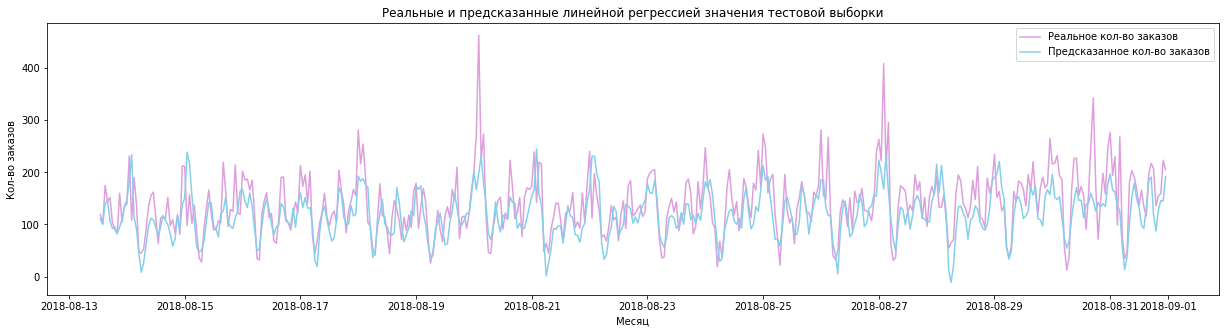

In [14]:
#визуализируем реальные и предсказанные значения тестовой выборки:
fig, ax = plt.subplots(figsize = figsize)
ax.plot(target_test.index, target_test, label='Реальное кол-во заказов', color = 'plum')
ax.plot(target_test.index, predictions, label='Предсказанное кол-во заказов', color = 'skyblue')
plt.title('Реальные и предсказанные линейной регрессией значения тестовой выборки')
plt.xlabel('Месяц')
plt.ylabel('Кол-во заказов')
plt.legend()
plt.show()

### Дерево решений

#### Обучение

In [15]:
best_rmse = 48

for max_lag in range(1, 15):                  
    for rolling_mean_size in range(1, 35):
        for max_depth in range(1, 20):
            data_sec = make_features(data, max_lag, rolling_mean_size)

            features_train, target_train, features_valid, target_valid, features_test, target_test = preprocess_data(data_sec)
    
            model = DecisionTreeRegressor(max_depth = max_depth, random_state = 12345)
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
        
            rmse = mean_squared_error(target_valid, predictions) ** .5
        
            if rmse < best_rmse:
                best_rmse = rmse
                best_max_lag = max_lag
                best_rolling_mean_size = rolling_mean_size
                best_max_depth = max_depth
            
print('Лучшее RMSE =', best_rmse,'при лаге', best_max_lag, 'окне', best_rolling_mean_size, 'и глубине', best_max_depth)

Лучшее RMSE = 34.00284988840401 при лаге 2 окне 8 и глубине 7


#### Тестирование

In [16]:
#тестируем модель на лучших параметрах
data_sec = make_features(data, best_max_lag, best_rolling_mean_size)

features_train, target_train, features_valid, target_valid, features_test, target_test = preprocess_data(data_sec)

model = DecisionTreeRegressor(max_depth = best_max_depth, random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
        
rmse = mean_squared_error(target_test, predictions) ** .5
print('RMSE дерева решений на тестовой выборке =', rmse)

RMSE дерева решений на тестовой выборке = 72.93978216036997


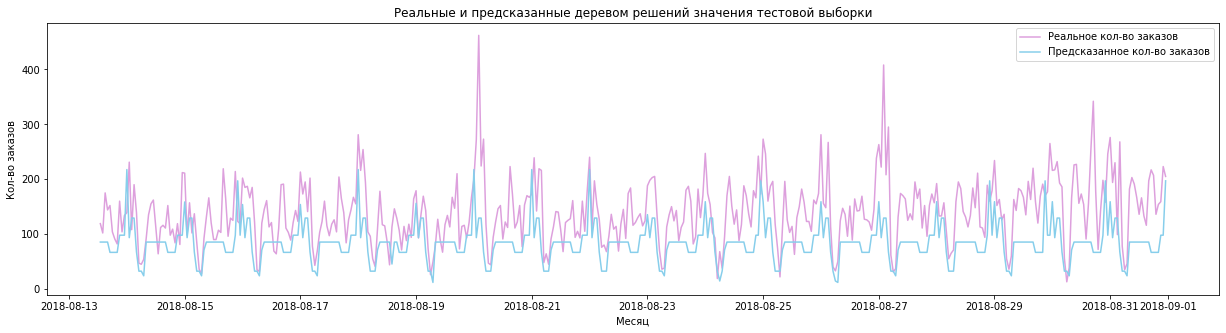

In [17]:
#визуализируем реальные и предсказанные значения тестовой выборки:
fig, ax = plt.subplots(figsize = figsize)
ax.plot(target_test.index, target_test, label='Реальное кол-во заказов', color = 'plum')
ax.plot(target_test.index, predictions, label='Предсказанное кол-во заказов', color = 'skyblue')
plt.title('Реальные и предсказанные деревом решений значения тестовой выборки')
plt.xlabel('Месяц')
plt.ylabel('Кол-во заказов')
plt.legend()
plt.show()

### LightGBMRegressor

#### Обучение

In [18]:
model = LGBMRegressor() 
parameters = [{'num_leaves':[25, 50, 100, 200], 'learning_rate':[.1, .3, .5], 'random_state':[12345]}]

tscv = TimeSeriesSplit(n_splits=5)

clf = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=tscv)
clf.fit(features_train, target_train)  #использую выборки полученные ранее

print(clf.best_params_)
print()

mts = clf.cv_results_['mean_test_score']

rsme = (max(mts) * -1) ** .5
print('RMSE LightGBMRegressor на тренировочной выборке =',rmse)

{'learning_rate': 0.1, 'num_leaves': 50, 'random_state': 12345}

RMSE LightGBMRegressor на тренировочной выборке = 72.93978216036997


#### Тестирование

In [19]:
#тестируем модель на лучших параметрах
model = LGBMRegressor(learning_rate=.1, num_leaves=25, random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
rsme = mean_squared_error(target_test, predictions) ** .5
print('RMSE LightGBMRegressor на тестовой выборке =', rsme)

RMSE LightGBMRegressor на тестовой выборке = 64.68977169724347


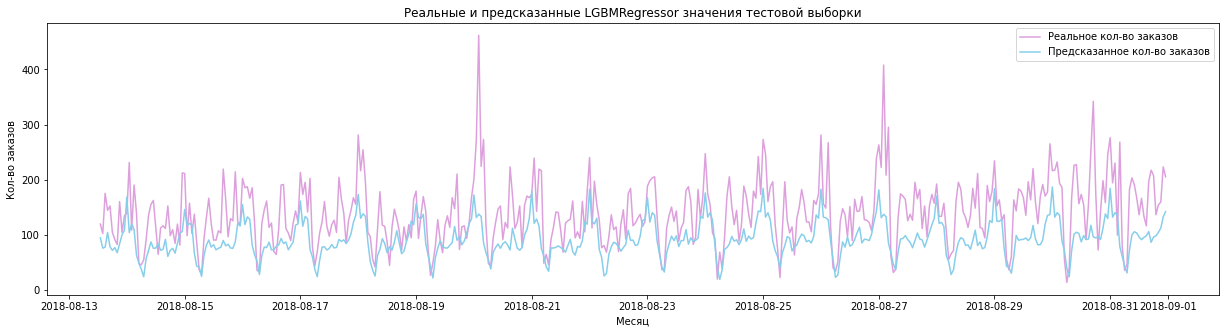

In [20]:
#визуализируем реальные и предсказанные значения тестовой выборки:
fig, ax = plt.subplots(figsize = figsize)
ax.plot(target_test.index, target_test, label='Реальное кол-во заказов', color = 'plum')
ax.plot(target_test.index, predictions, label='Предсказанное кол-во заказов', color = 'skyblue')
plt.title('Реальные и предсказанные LGBMRegressor значения тестовой выборки')
plt.xlabel('Месяц')
plt.ylabel('Кол-во заказов')
plt.legend()
plt.show()

## Выводы

Из трёх моделей только у линейной регрессии RMSE получилось меньше 48, что видно и по графику. Для RMSE = 47 на тестовых данных подошли лаг 48 и окно 1.